# Checking directory

In [5]:
import os
os.getcwd()

'C:\\Users\\Bishal'

# Changing working directory

In [6]:
os.chdir("F:\\Data Science Course\\Assignment\\Keggle data for Practice")

# Importing all liabraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
plt.rcParams['figure.figsize'] = (12,8)

# Import data

In [8]:
loan_data= pd.read_csv("loan_data.csv")
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,Revolving_days,revol_bal,revol_util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
# checking no of rows and colomns
loan_data.shape

(9578, 14)

In [10]:
# checking colomns names
loan_data.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'Revolving_days', 'revol_bal', 'revol_util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not_fully_paid'],
      dtype='object')

# Data Exploration 

Missing Value Treatment

In [11]:
# checking missing value in the original data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit_policy     9578 non-null int64
purpose           9578 non-null object
int_rate          9578 non-null float64
installment       9578 non-null float64
log_annual_inc    9578 non-null float64
dti               9578 non-null float64
fico              9578 non-null int64
Revolving_days    9578 non-null float64
revol_bal         9578 non-null int64
revol_util        9578 non-null float64
inq.last.6mths    9578 non-null int64
delinq.2yrs       9578 non-null int64
pub.rec           9578 non-null int64
not_fully_paid    9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
# checking number of missing value in the original data
loan_data.isnull().sum()

credit_policy     0
purpose           0
int_rate          0
installment       0
log_annual_inc    0
dti               0
fico              0
Revolving_days    0
revol_bal         0
revol_util        0
inq.last.6mths    0
delinq.2yrs       0
pub.rec           0
not_fully_paid    0
dtype: int64

Correlation Matrix

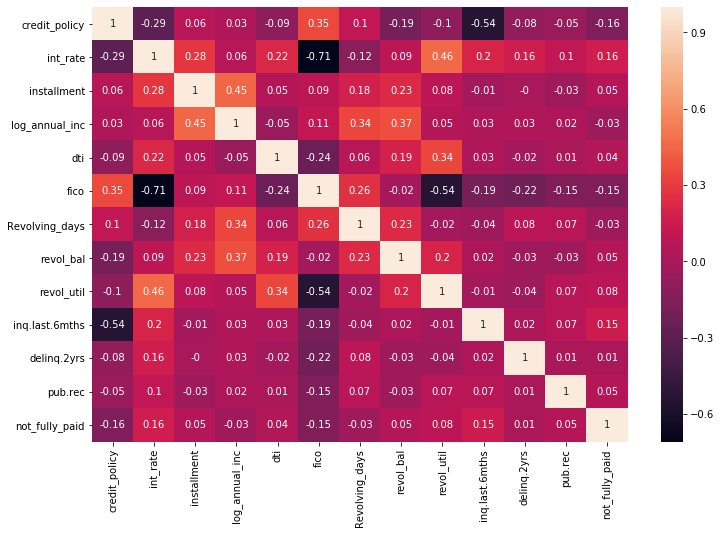

In [13]:
# Checking correlation among independent variables and with target variable
correlation_matrix = loan_data.corr().round(2)
f, ax = plt.subplots(figsize =(12, 8)) 
sns.heatmap(data=correlation_matrix, annot=True)

Observations from the Correlation matrix
1. Fico and int.rate has high negative correlation of -0.71 (Multi co-linearity)
2. No independant variable has high correlation with targat variable

So we can remove fico from the data set as we need to remove either Fico or int rate from the date set.

In [14]:
# dropping fico from the data
loan_data_new = loan_data.drop(["fico"], axis = 1)
loan_data_new.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,Revolving_days,revol_bal,revol_util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0,0


In [15]:
loan_data_new.shape

(9578, 13)

Creating Dummy Variables

In [16]:
# creating dummmy varaibles (replacing categorical varaiables to numeric varibales)
loan_data_new= pd.get_dummies(loan_data_new,columns= ['purpose'], drop_first = True)
loan_data_new.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,Revolving_days,revol_bal,revol_util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [17]:
loan_data_new.shape

(9578, 18)

In [18]:
# checkking statistical summary of the dataset
loan_data_new.describe(include="all")

,credit_policy,int_rate,installment,log_annual_inc,dti,Revolving_days,revol_bal,revol_util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Outlier Treatment

In [19]:
print(loan_data_new.std())

credit_policy                     0.396245
int_rate                          0.026847
installment                     207.071301
log_annual_inc                    0.614813
dti                               6.883970
Revolving_days                 2496.930377
revol_bal                     33756.189557
revol_util                       29.014417
inq.last.6mths                    2.200245
delinq.2yrs                       0.546215
pub.rec                           0.262126
not_fully_paid                    0.366676
purpose_credit_card               0.338248
purpose_debt_consolidation        0.492422
purpose_educational               0.185829
purpose_home_improvement          0.247720
purpose_major_purchase            0.208682
purpose_small_business            0.245880
dtype: float64


In [22]:
#checking the percentiles of variables which has high sd (installment,Revolving_days and revol_bal)
# 1st- installment
pd.DataFrame(loan_data_new,columns =['installment',"Revolving_days","revol_bal"]).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,installment,Revolving_days,revol_bal
count,9578.000000,9578.000000,9.578000e+03
mean,319.089413,4560.767197,1.691396e+04
std,207.071301,2496.930377,3.375619e+04
min,15.670000,178.958333,0.000000e+00
1%,33.100900,570.032083,0.000000e+00
10%,95.320000,1800.000000,7.107000e+02
30%,176.193000,3120.041667,4.105000e+03
50%,268.950000,4139.958333,8.596000e+03
75%,432.762500,5730.000000,1.824950e+04
90%,659.370000,7830.041667,3.522760e+04


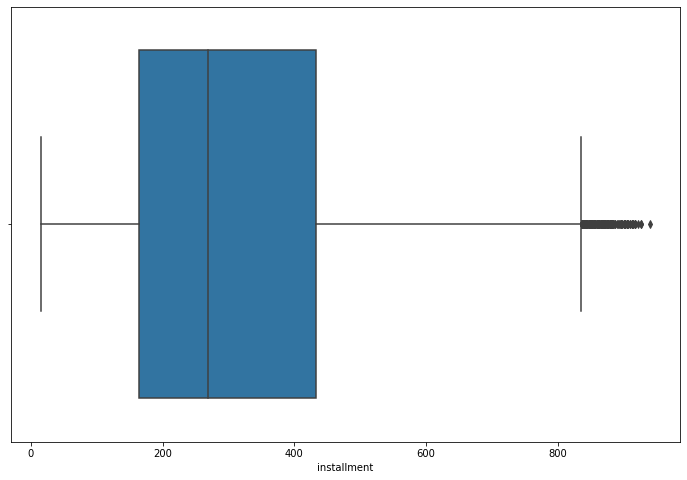

In [25]:
#Plotting box plot to check outliers (for installment)
import seaborn as sns
sns.boxplot(x=loan_data_new.installment)

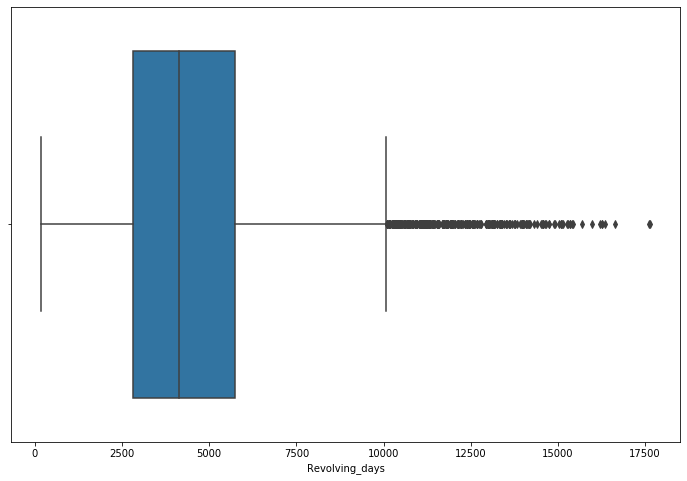

In [26]:
# Plotting box plot to check outliers (for Revolving_days)
sns.boxplot(x=loan_data_new.Revolving_days)

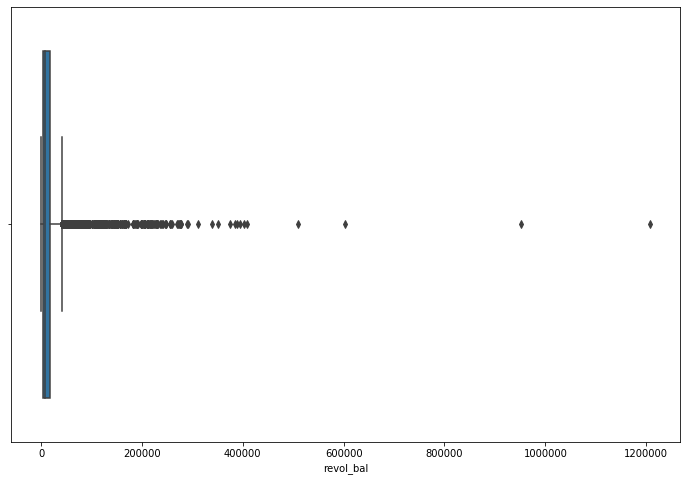

In [27]:
# Plotting box plot to check outliers (for revol_bal)
sns.boxplot(x=loan_data_new.revol_bal)

In [28]:
# Outlier removal by Inter Quartile Range method (For installment)

installment_col_df = pd.DataFrame(loan_data_new['installment'])
installment_median = installment_col_df.median()

Q3 = installment_col_df.quantile(q=0.75)
Q1 = installment_col_df.quantile(q=0.25)
IQR = Q3-Q1

IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

print(IQR_LL,IQR_UL,installment_median)

loan_data_new.loc[loan_data_new['installment']>IQR_UL , 'installment'] = installment_col_df.quantile(q=0.99)
loan_data_new.loc[loan_data_new['installment']<IQR_LL , 'installment'] = installment_col_df.quantile(q=0.01)

-239 836 installment    268.95
dtype: float64


In [29]:
# Outlier removal by Inter Quartile Range method (For Revolving_days)

Revolving_days_col_df = pd.DataFrame(loan_data_new['Revolving_days'])
Revolving_days_median = Revolving_days_col_df.median()

Q3 = Revolving_days_col_df.quantile(q=0.75)
Q1 = Revolving_days_col_df.quantile(q=0.25)
IQR = Q3-Q1

IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

print(IQR_LL,IQR_UL,Revolving_days_median)

loan_data_new.loc[loan_data_new['Revolving_days']>IQR_UL , 'Revolving_days'] = Revolving_days_col_df.quantile(q=0.99)
loan_data_new.loc[loan_data_new['Revolving_days']<IQR_LL , 'Revolving_days'] = Revolving_days_col_df.quantile(q=0.01)

-1545 10095 Revolving_days    4139.958333
dtype: float64


In [30]:
# Outlier removal by Inter Quartile Range method (For revol_bal)

revol_bal_col_df = pd.DataFrame(loan_data_new['revol_bal'])
revol_bal_median = revol_bal_col_df.median()

Q3 = revol_bal_col_df.quantile(q=0.75)
Q1 = revol_bal_col_df.quantile(q=0.25)
IQR = Q3-Q1

IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

print(IQR_LL,IQR_UL,revol_bal_median)

loan_data_new.loc[loan_data_new['revol_bal']>IQR_UL , 'revol_bal'] = revol_bal_col_df.quantile(q=0.99)
loan_data_new.loc[loan_data_new['revol_bal']<IQR_LL , 'revol_bal'] = revol_bal_col_df.quantile(q=0.01)

-19406 40843 revol_bal    8596.0
dtype: float64


Checking Boxplot after treating outliers

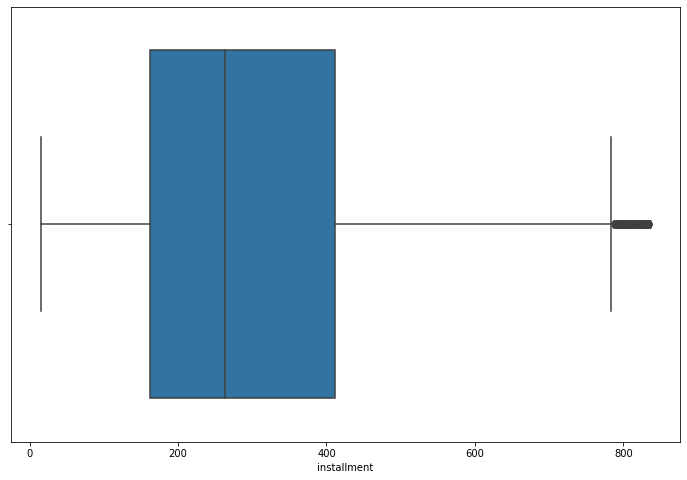

In [31]:
sns.boxplot(x=loan_data_new.installment)


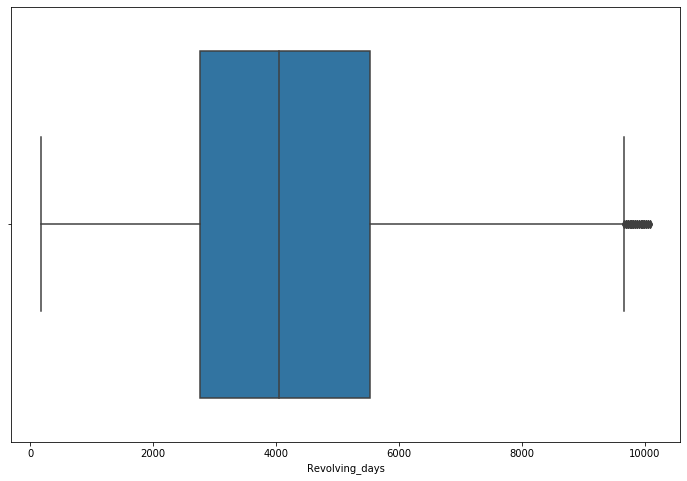

In [32]:
sns.boxplot(x=loan_data_new.Revolving_days)

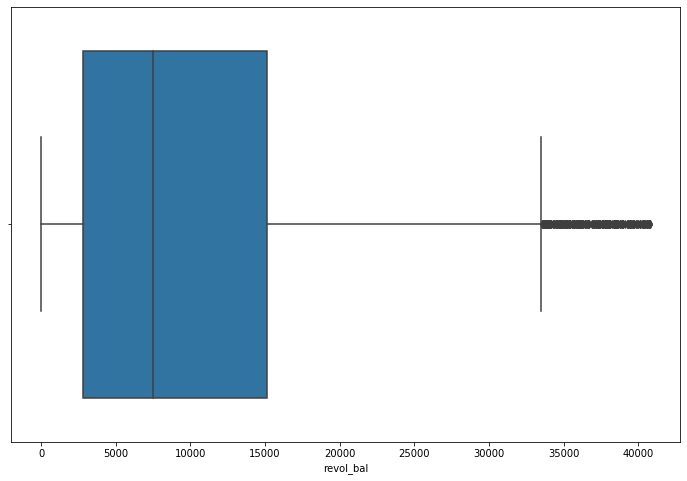

In [33]:
sns.boxplot(x=loan_data_new.revol_bal)

In [34]:
loan_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 18 columns):
credit_policy                 9578 non-null int64
int_rate                      9578 non-null float64
installment                   9339 non-null float64
log_annual_inc                9578 non-null float64
dti                           9578 non-null float64
Revolving_days                9232 non-null float64
revol_bal                     8798 non-null float64
revol_util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not_fully_paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9578 non-null uint8
purpose_small_business       

In [35]:
loan_data_new.isnull().sum()

credit_policy                   0
int_rate                        0
installment                   239
log_annual_inc                  0
dti                             0
Revolving_days                346
revol_bal                     780
revol_util                      0
inq.last.6mths                  0
delinq.2yrs                     0
pub.rec                         0
not_fully_paid                  0
purpose_credit_card             0
purpose_debt_consolidation      0
purpose_educational             0
purpose_home_improvement        0
purpose_major_purchase          0
purpose_small_business          0
dtype: int64

In [36]:
loan_data_new.loc[loan_data_new['installment']>IQR_UL , 'installment'] = int(installment_col_df.quantile(q=0.99))

In [37]:
loan_data_new.loc[loan_data_new['Revolving_days']>IQR_UL , 'Revolving_days'] = int(Revolving_days_col_df.quantile(q=0.99))

In [38]:
loan_data_new.loc[loan_data_new['revol_bal']>IQR_UL , 'revol_bal'] = int(revol_bal_col_df.quantile(q=0.99))

In [39]:
loan_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 18 columns):
credit_policy                 9578 non-null int64
int_rate                      9578 non-null float64
installment                   9339 non-null float64
log_annual_inc                9578 non-null float64
dti                           9578 non-null float64
Revolving_days                9232 non-null float64
revol_bal                     8798 non-null float64
revol_util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not_fully_paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9578 non-null uint8
purpose_small_business       

In [40]:
loan_data_new.isnull().sum()

credit_policy                   0
int_rate                        0
installment                   239
log_annual_inc                  0
dti                             0
Revolving_days                346
revol_bal                     780
revol_util                      0
inq.last.6mths                  0
delinq.2yrs                     0
pub.rec                         0
not_fully_paid                  0
purpose_credit_card             0
purpose_debt_consolidation      0
purpose_educational             0
purpose_home_improvement        0
purpose_major_purchase          0
purpose_small_business          0
dtype: int64

In [41]:
# replacing missing values with mean
loan_data_new.median(axis=0)


credit_policy                    1.000000
int_rate                         0.122100
installment                    263.720000
log_annual_inc                  10.928884
dti                             12.665000
Revolving_days                4050.000000
revol_bal                     7513.000000
revol_util                      46.300000
inq.last.6mths                   1.000000
delinq.2yrs                      0.000000
pub.rec                          0.000000
not_fully_paid                   0.000000
purpose_credit_card              0.000000
purpose_debt_consolidation       0.000000
purpose_educational              0.000000
purpose_home_improvement         0.000000
purpose_major_purchase           0.000000
purpose_small_business           0.000000
dtype: float64

In [65]:
train_Data = ["installment","Revolving_days","revol_bal"]

for item in train_Data:
    loan_data_new[item].fillna((loan_data_new[item].median()), inplace = True)
    
loan_data_new.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,Revolving_days,revol_bal,revol_util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,5639.958333,28854.0,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623.0,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,4710.000000,3511.0,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,2699.958333,33667.0,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,4066.000000,4740.0,39.5,0,1,0,0,1,0,0,0,0,0


In [66]:
loan_data_new.isnull().sum()

credit_policy                 0
int_rate                      0
installment                   0
log_annual_inc                0
dti                           0
Revolving_days                0
revol_bal                     0
revol_util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not_fully_paid                0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

# Data Visualization

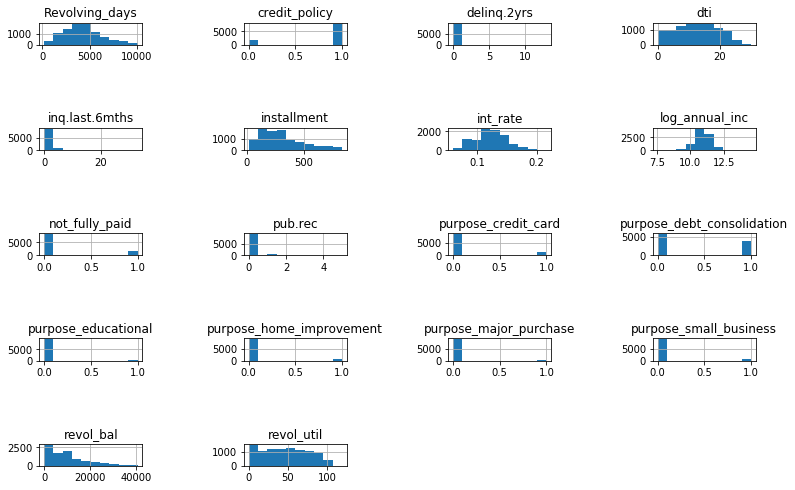

In [44]:
# plotting Histigram
loan_data_new.hist()
plt.tight_layout(5)
plt.show()

In [45]:
loan_data_new["not_fully_paid"].value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

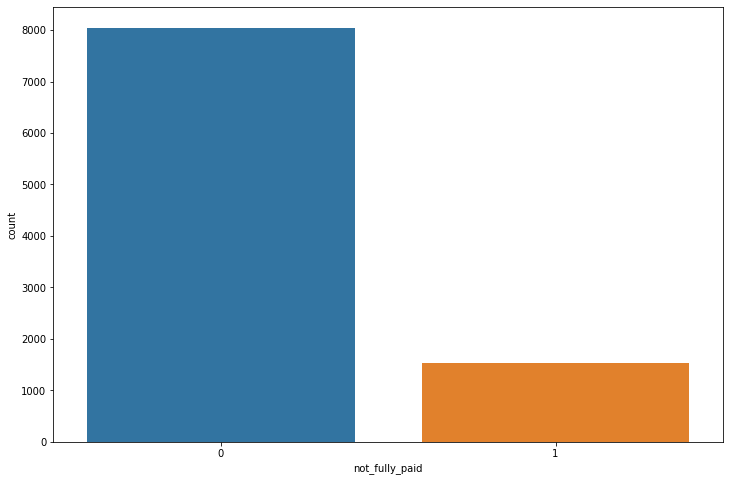

In [46]:
#make plot of target variable
sns.countplot(x='not_fully_paid', data = loan_data_new)
plt.show()

# Model Creation

In [47]:
# separating respnse and predictors variable
loan_data_new.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,Revolving_days,revol_bal,revol_util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,5639.958333,28854.0,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623.0,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,4710.000000,3511.0,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,2699.958333,33667.0,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,4066.000000,4740.0,39.5,0,1,0,0,1,0,0,0,0,0


In [48]:
features= ['credit_policy',"int_rate",'installment','log_annual_inc','dti','Revolving_days','revol_bal',"revol_util",'inq.last.6mths',"delinq.2yrs","pub.rec","not_fully_paid","purpose_credit_card","purpose_debt_consolidation","purpose_educational","purpose_home_improvement","purpose_major_purchase","purpose_small_business"]
print(features)

['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti', 'Revolving_days', 'revol_bal', 'revol_util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not_fully_paid', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']


In [49]:
x= loan_data_new[features]
y= loan_data_new["not_fully_paid"]

In [50]:
x.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,Revolving_days,revol_bal,revol_util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,5639.958333,28854.0,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623.0,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,4710.000000,3511.0,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,2699.958333,33667.0,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,4066.000000,4740.0,39.5,0,1,0,0,1,0,0,0,0,0


In [51]:
x.shape

(9578, 18)

In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not_fully_paid, dtype: int64

# Split the data into train and test

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Train the model

In [54]:
# fitting LR model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\Bishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predict the test results

In [55]:
y_pred = logreg.predict(x_test)

# Check accuracy of the model

In [56]:
from sklearn import metrics
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))

Accuracy of logistic regression classifier on test set: 1.00


In [57]:
print('Accuracy of logistic regression classifier on test set: %d', (logreg.score(x_test,y_test)))

Accuracy of logistic regression classifier on test set: %d 1.0


# Evaluate the model using confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2406    0]
 [   0  468]]


# Check the detailed classification report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2406
           1       1.00      1.00      1.00       468

    accuracy                           1.00      2874
   macro avg       1.00      1.00      1.00      2874
weighted avg       1.00      1.00      1.00      2874



# Plot ROC Curve

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [61]:
logit_roc_auc = roc_auc_score(y_test, y_pred) #This is to calculate AUC(Area under curve)

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

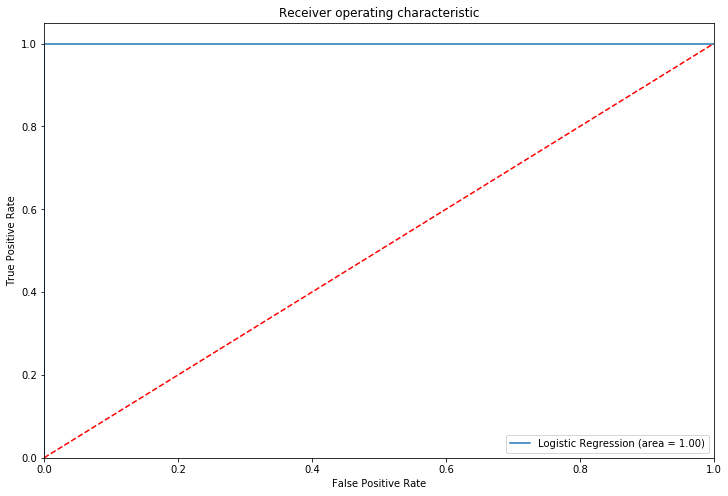

In [67]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
